Nesta aula vamos por em prática o que aprendemos até aqui:

- Criar um notebook no Google Colab
- Salvar no Google Drive
- Fazer upload de arquivos de dados no sistema de arquivos local do notebook
- Fazer upload de arquivos de dados no Google Drive e montar seu Google Drive no notebook
- Criar script para carregar dados
- Transformar os dados carregados do formato largo para o formato longo.

## Criando um notebook no Google Colab

Siga o passo a passo para criar um novo notebook no Google Colab.

![Acessar o site do Google Colab: https://colab.research.google.com/](colab-001.png)


![Clicar em "Novo notebook". Será aberta uma nova página com um notebook em branco](colab-002.png)


![Para modificar o nome do notebook para "PrimeiroNotebook", clicar em "Arquivo > Salvar uma cópia no Drive" no menu superior. Na janela que aparece, modificar o nome para "PrimeiroNotebook" e clicar em "OK".](colab-003.png)


Agora, vamos aprender como escrever um código em Python e executa-lo no notebook.

![No notebook aberto, criar uma nova célula clicando no botão "+ Célula" acima do menu superior ou utilizando o atalho "Ctrl+M B" no teclado](colab-004.png)


![Na nova célula, digitar o código `print('Hello World')`](colab-005.png)


![Clicar em "Executar" na célula, ou utilizar o atalho "Shift+Enter". O resultado "Hello World" será exibido abaixo da célula](colab-006.png)



Dessa forma, o notebook "PrimeiroNotebook" estará pronto para ser utilizado. Lembrando que o Google Colab é uma ferramenta gratuita e muito útil para desenvolvimento de projetos de análise de dados, aprendizado de máquina e outros projetos de programação em Python.

## Carregando dados em um notebook

Agora que temos nosso notebook inicial, vamos exercitar o princípio mais básico de toda a visualização de dados: a carga dos dados que serão visualizados.

Para fazer isso, precisamos primeiro de uma fonte de dados. Uma fonte de dados pode ter formatos bem comuns e conhecidos como CSV, Excel e JSON, até outros formatos especializados como Feather, Arrow, Parquet,...Quanto à origem da fonte de dados, elas podem ser um arquivo local no seu computador ou no servidor onde a rotina executará ou até mesmo uma URL. Por questões de performance, o arquivo local tem uma certa preferência.

Quando utilizamos o Google Colab, o nosso notebook tem duas possibilidades para poder ler arquivos de forma local: 
- os arquivos podem ser armazenados no sistema de arquivos local do notebook, que é temporário, ou 
- podemos deixar nossos arquivos no Google Drive e conectamos o Google Drive ao nosso notebook 
 
Vamos ver esses dois cenários em detalhe nas próximas seções.

### Disponibilizando arquivos a partir do sistema local do notebook


O sistema de arquivos local do notebook (*session storage*) é uma maneira muito conveniente de manter de forma local alguns arquivos de dados que precisamos trabalhar. Em termos de performance, seria a mesma coisa que executar tudo no seu próprio computador. O incoveninente desse método é que o session storage é destruído quando fechamos o notebook ou ele fica inativo por muito tempo. Ele é recriado quando reabrimos o notebook, mas vem vazio.

:::{.callout-tip}
Para o restante das aulas, todos os arquivos de dados que iremos utilizar podem ser encontrados em: [LabEduc datasets](https://github.com/labeduc/datasets)

Você pode fazer o download ou tentar carregar direto da URL (veremos como fazer isso mais adiante).
:::


Para utilizar o session storage, siga os passos abaixo:

![Clique no botão Arquivos que fica à esquerda](load-file-001.png)

![Clique no botão de fazer upload de arquivos](load-file-002.png)

![Selecione o arquivo que deseja subir e clique no botão Abrir](load-file-003.png)

![Após o término do upload, você deve ver o arquivo no seu sistema de arquivos do notebook](load-file-004.png)

E pronto, temos um arquivo pronto para ser utilizado!

### Disponibilizando arquivos a partir do Google Drive

Outra maneira maneira mais permanente utilizar o session storage é montar nosso Google Drive como uma pasta da session storage.

Para fazer isso, vamos colocar no inicio do nosso notebook uma célula com o código abaixo:

```python
from google.colab import drive
drive.mount('/content/drive')
```

Vamos executar a célula e o Google Colab deve pedir permissão para se conectar ao Drive e no final emitir a mensagem abaixo. Além disso, na lista de pastas, à esquerda, devemos ver a pasta que indicamos que receberia o mount do Google Drive.

![Google Drive mapeado após a execução do código](map-drive-002.png)

A próxima etapa é realizar a carga de um arquivo com nosso script, para que possamos realizar nossas análises.

### Carregar um arquivo de dados no notebook

Para esse etapa, vamos utilizar a função nativa do Python para abrir arquivos **open** em conjunto com a biblioteca **csv** para carregar o conteúdo do nosso arquivo em um objeto que será posteriormente utilizado pela biblioteca de visualização. Você pode copiar e colar o código abaixo em seu próprio notebook e testar. Não esqueça que antes, você deve fazer o upload do arquivo `pokemons.csv` no sistema de arquivos local do notebook. 

In [1]:
import csv                                                   # importa a biblioteca nativa csv

pokemons = []                                                # cria a lista de pokemons vazia
with open('pokemons.csv', 'r', encoding='utf-8') as arquivo: # abre o arquivo
  dados = csv.DictReader(arquivo)                            # utiliza a biblioteca csv para ler cada linha do arquivo 
                                                             # e carrega-la em um dicionário de dados
  for pokemon in dados:                                      # percorre o arquivo linha a linha
    pokemons.append(pokemon)                                 # adiciona cada linha na nova lista

Para verificar se o conteúdo foi carregado na lista de pokemons, podemos executar o código abaixo:

In [2]:
for indice in range(0, 2):    # executa um loop dos dois primeiros elementos do array
  print(pokemons[indice])     # imprime o elemento

{'Number': '1', 'Name': 'Bulbasaur', 'Type 1': 'Grass', 'Type 2': 'Poison', 'Abilities': "['Chlorophyll', 'Overgrow']", 'HP': '45', 'Att': '49', 'Def': '49', 'Spa': '65', 'Spd': '65', 'Spe': '45', 'BST': '318', 'Mean': '53.0', 'Standard Deviation': '8.640987597877146', 'Generation': '1.0', 'Experience type': 'Medium Slow', 'Experience to level 100': '1059860', 'Final Evolution': '0.0', 'Catch Rate': '45', 'Legendary': '0.0', 'Mega Evolution': '0.0', 'Alolan Form': '0.0', 'Galarian Form': '0.0', 'Against Normal': '1.0', 'Against Fire': '2.0', 'Against Water': '0.5', 'Against Electric': '0.5', 'Against Grass': '0.25', 'Against Ice': '2.0', 'Against Fighting': '0.5', 'Against Poison': '1.0', 'Against Ground': '1.0', 'Against Flying': '2.0', 'Against Psychic': '2.0', 'Against Bug': '1.0', 'Against Rock': '1.0', 'Against Ghost': '1.0', 'Against Dragon': '1.0', 'Against Dark': '1.0', 'Against Steel': '1.0', 'Against Fairy': '0.5', 'Height': '0.7', 'Weight': '6.9', 'BMI': '14.1'}
{'Number': '

Podemos ver no resultado da célula de código que aquele `for` imprimiu o conteúdo de duas linhas do arquivo de pokemons.

## Transformando do formato Largo para o Longo

Certo, se você chegou até aqui, então:
- Criamos um notebook
- Demos um nome para ele
- Fizemos o upload de um arquivo de dados para o session storage do notebook
- Carregamos os dados em uma lista na memória do notebook.

O que vem a seguir? Vamos começar a utilizar estes dados.

### Utilizando os dados na memória


Em um cenário real, um Cientista de Dados iniciaria agora a etapa de exploração dos dados. Essa etapa envolve trabalhar com a correlação entre as diversas variáveis contidas nos dados, totalizações de quantidade de registros por qualquer uma dessas variáveis, e, também plotando gráficos.

Vamos a um exemplo? Digamos que eu quero totalizar a quantidade pokemons de acordo com seu tipo. Essa totalização poderia ser utilizada para criar um gráfico de barras, mostrando a distribuição dos pokemons entre os tipos, mostrando qual tipo é mais frequente. É importante aqui ressaltar que temos no conjunto de dados duas colunas que especificam o tipo: `Type 1` e `Type 2`.

O código para fazer isso está logo abaixo.

In [3]:
tipos_dict = {}
for item in pokemons:
  if item['Type 1']:
      tipos_dict[item['Type 1']] = tipos_dict.get(item['Type 1'], 0) + 1
  
  if item['Type 2']:
      tipos_dict[item['Type 2']] = tipos_dict.get(item['Type 2'], 0) + 1

tipos = []
for key, value in tipos_dict.items():
  tipos.append({"Tipo": key, "Valor": value})

for item in tipos:
   print(item)

{'Tipo': 'Grass', 'Valor': 119}
{'Tipo': 'Poison', 'Valor': 77}
{'Tipo': 'Fire', 'Valor': 81}
{'Tipo': 'Flying', 'Valor': 120}
{'Tipo': 'Dragon', 'Valor': 72}
{'Tipo': 'Water', 'Valor': 151}
{'Tipo': 'Bug', 'Valor': 90}
{'Tipo': 'Normal', 'Valor': 124}
{'Tipo': 'Dark', 'Valor': 72}
{'Tipo': 'Electric', 'Valor': 70}
{'Tipo': 'Psychic', 'Valor': 119}
{'Tipo': 'Ground', 'Valor': 80}
{'Tipo': 'Ice', 'Valor': 56}
{'Tipo': 'Steel', 'Valor': 71}
{'Tipo': 'Fairy', 'Valor': 63}
{'Tipo': 'Fighting', 'Valor': 73}
{'Tipo': 'Rock', 'Valor': 74}
{'Tipo': 'Ghost', 'Valor': 68}


Esse código tem como objetivo contar a quantidade de ocorrências de cada tipo de Pokémon e imprimir os resultados. Ele faz isso utilizando um dicionário (tipos_dict) para armazenar a contagem de cada tipo e uma lista de dicionários (tipos) para armazenar os resultados finais.

A primeira parte do código cria um dicionário vazio chamado tipos_dict. Em seguida, itera sobre uma lista de dicionários chamada pokemons. Para cada dicionário na lista, verifica se o valor da chave 'Type 1' e 'Type 2' é diferente de None. Se pelo menos um desses valores existir, a chave correspondente no dicionário tipos_dict é incrementada em 1.

A segunda parte do código cria uma lista vazia chamada tipos e itera sobre os pares de chave-valor no dicionário tipos_dict. Para cada par de chave-valor, cria um novo dicionário com as chaves "Tipo" e "Valor", e adiciona esse dicionário à lista tipos. A última parte é apenas para nosso benefício: ela imprime o conteúdo da lista tipos. 

Voltando ao nosso cenário real, utilizaríamos a lista tipos para plotar um gráfico, por exemplo. Vamos tentar?

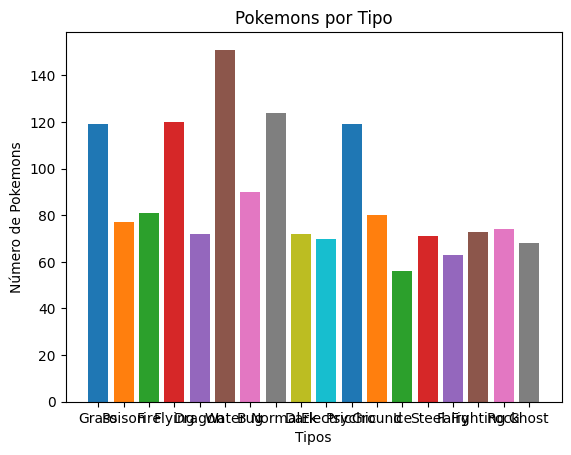

In [4]:
import matplotlib.pyplot as plt

# Cria o gráfico de barras
for item in tipos:
  plt.bar(item['Tipo'], item['Valor'])

# Configura o título do gráfico e dos eixos
plt.title('Pokemons por Tipo')
plt.xlabel('Tipos')
plt.ylabel('Número de Pokemons')

# Exibe o gráfico na tela
plt.show()

Olha só, conseguimos! Temos claramente um problema de formatação ocorrendo (o eixo do X está pequeno e a descrição dos tipos estão se sobrepondo), mas com alguns ajustes é um resultado correto. Mas ainda existem alguns problemas que precisam ser discutidos.

### Transformando o formato dos dados

O nosso script, embora correto, sob o ponto de vista de Cientistas de Dados, deixa um pouco a desejar sob o ponto de vista da engenharia de software. Por exemplo, utilizamos muito mais memória que o necessário para realizar a totalização, porque tinhamos que analisar o registro completo que tem mais de 50 colunas, mesmo que precisassemos apenas de duas. Para obter os dados que funcionassem com a visualização, tivemos que fazer duas transformações. E ainda, na parte onde fazemos o plot do gráfico, tivemos que recorrer a um `for loop` para conseguir adicionar todas a barras no gráfico.

E esses problema ocorrem porque os dados acima estão no formato largo. Quando estamos iniciando, isso talvez não pareça um grande problema, mas conforme a complexidade das nossas análises aumenta, utilização de memória, redução da quantidade leitura/escrita e a otimização do código se tornarão mais e mais importantes.

Para resolver isso, podemos transformar os nossos dados para o formato longo. Vamos ver como podemos fazer isso no nosso código.

In [5]:
import csv

pokemons = {}
with open('pokemons.csv', 'r', encoding='utf-8') as arquivo:
  dados = csv.DictReader(arquivo)

  for pokemon in dados:
    for key, value in pokemon.items():
      pokemons.setdefault(key,[]).append(value)

Este trecho de código em Python é bem parecido com o nosso código inicial, no sentido em que usamos as mesmas bibliotecas e executamos os mesmos primeiros passos. A diferença começa no primeiro `for loop`.

O `for loop` que segue itera sobre os dados do arquivo CSV, que são retornados como um dicionário. Para cada dicionário de dados, o código itera sobre as chaves do dicionário (que correspondem às colunas do arquivo CSV) e adiciona os valores correspondentes à lista correspondente no dicionário pokemons.

Por exemplo, se o arquivo CSV tiver uma coluna chamada "Nome" contendo os nomes dos Pokémons, o código adicionará cada nome encontrado à lista pokemons["Name"]. Essa abordagem permite armazenar os dados dos Pokémons de forma organizada e fácil de manipular.

Ao final da execução desse trecho de código, o dicionário pokemons terá as informações lidas do arquivo CSV. Cada chave do dicionário corresponderá a uma coluna do arquivo CSV, e cada valor corresponderá à lista dos valores encontrados nessa coluna. Por exemplo, se o arquivo CSV tiver uma coluna chamada "Type 1", a lista pokemons["Type 1"] conterá os tipos encontrados nessa coluna.

Agora vamos ver como iremos contabilizar os tipos neste novo formato e plotar o gráfico.

<Axes: ylabel='count'>

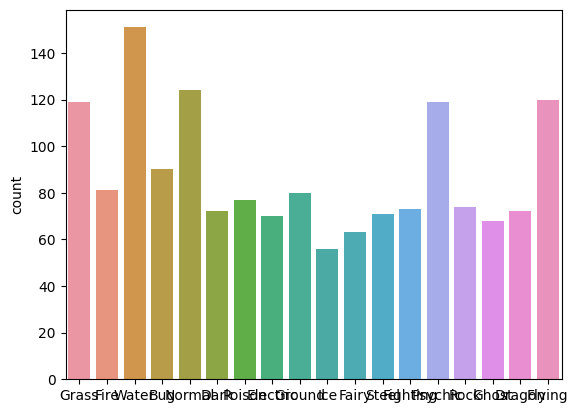

In [6]:
total = { "Tipo": list(filter(None,pokemons["Type 1"])) + list(filter(None,pokemons["Type 2"]))}

import seaborn as sns
sns.countplot(x='Tipo', data=total)

Ficou bem mais fácil fazer o plot deste gráfico, não? Temos basicamente o mesmo resultado com menos linhas. E se observarmos bem, no momento que fazemos o processo na primeira linha, acessamos apenas as colunas que estão envolvidas no cálculo.

## Usando bibliotecas externas para facilitar o trabalho

Estamos chegando ao fim desta aula prática, e o aprendizado obtido acredito ter sido bem relevante. Já sabemos como disponibilizar um arquivo de dados para ser consumido pelo script em nosso notebook, aprendemos a formatar esse arquivo em memória para um processamento mais eficiente, e também mostramos rapidamente como utilizar o dado processado para plotar alguns gráficos.

Se vocês olharam com atenção ao código que escrevemos, verão que utilizamos muita vezes, no início de cada parte do script o comando `import`. Esse comando é utilizado para deixarmos explicito no script quais bibliotecas externas ao módulo básico da linguagem Python. O objetivo dessas bibliotecas é justamente nos ajudar com a simplificação do código.

Ao longo do restante das aulas, iremos utilizar várias bibliotecas como Pandas, Seaborn, MatplotLib e muitas outras. Ao final de cada aula, deixaremos alguns links que os ajudarão a começar a entender melhor cada uma dessas biblioteca.

E nesta aula, vamos deixar o link para a documentação do Python, a partir de onde poderemos nos informar sobre várias bibliotecas que usamos cotidianamente como `csv, json, os, sys, logging, ...`.

:::{.callout-tip}
[Python Docs - Library Reference](https://docs.python.org/3/library/index.html)
:::

